# Data och ljud - gränslandet mellan musik och vetenskap

Vetenskap och konst har en intressant relation, som mänskligheten har fått njuta av under hela sin historia. I den här övningen tar vi en titt på hur vi kan producera ljud från information som inte är ämnad för det. Musik och andra ljud består egentligen bara av vågor, variationer i lufttryck, som överför information till våra sinnen. Om informationen ändrar, så ändras även ljudet som vi uppfattar.





Intressant läsning angående detta: Artikeln [Data from the LHC converted to piano music](https://phys.org/news/2017-05-lhc-piano-music.html) och videon [LHChamber Music](https://www.youtube.com/watch?v=gPmQcviT-R4) som visar ett exempel på sonifiering.

### Vi hämtar verktygen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython import display   # Innehåller verktyg för att skapa ljudfiler

%matplotlib inline

In [2]:
# Vi läser in data som visar kollisioner mellan två myoner.

muons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

### Hur skapar man ljud

Ljud är vågor, så vi skapar först en sinusvåg som grund. Nedan gör vi en exempelvåg, som du kan ändra om du vill. 

Kodcellen skapar en ljudfil, som du kan lyssna på. Ljudet kan skära lite i öronen, så använd hörlurar på låg volym för din egen och omgivningens skull.

In [29]:
lngth = 20; base_freq = 110; rate = 20000
ts = np.arange(0, lngth, step=lngth/2/rate)
sweep = np.sqrt((lngth-ts)) * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))

display.Audio(sweep, rate=rate/2)

Sedan gör vi något mer intressant: Vi skapar ljud från vår mätdata på samma sätt. Om datan inte redan är en våg, hur kan vi göra om den till en sådan?

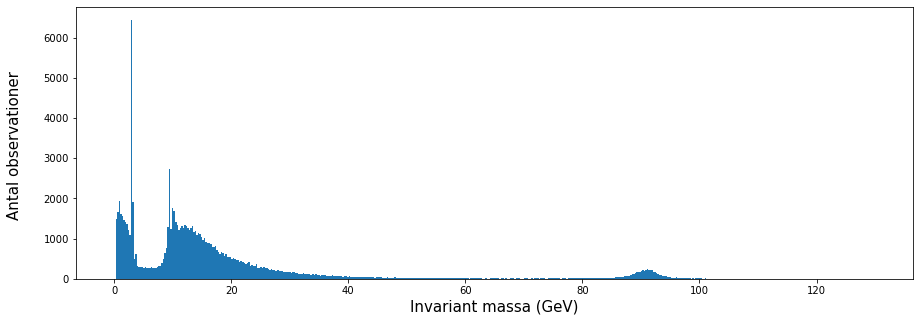

In [30]:
# Vi tar en titt på hur datan ser ut.

plt.figure(figsize = (15,5))
plt.hist(muons.M, bins = 500, range=(0,130))
plt.xlabel("Invariant massa (GeV)", fontsize = 15)
plt.ylabel("Antal observationer \n", fontsize = 15)
plt.show()

Nu tar vi en titt på den invarianta massan. Vi delar upp histogrammet i intervall och använder antalet observationer inom varje intervall som en faktor för att amplifiera grundvågen som vi har skapat. Då får vi ett ljud vars styrka följer diagrammet. När vi har lyckats med det här kan du testa att göra samma sak med någon annan variabel i vår data, så som energin eller rörelsemängden.

In [31]:
cut = muons.M
lngth = len(cut); base_freq = 440; rate = 44100/2

In [32]:
hist, edges = np.histogram(cut, bins = 500)

In [38]:
a = []

for x in range(0, len(hist)):
    b = hist[x]*np.ones(hist[x])
    a = np.append(a,b)

In [39]:
ts = cut.sort_values()

In [45]:
# sweep = np.sqrt((lngth-ts)) * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))
# sweep = a * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))
# sweep = a * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2)) 
#            + np.cos(base_freq*np.power(2, 5/12)*ts**2))
# Här ovan finns några exempelvågor. Du kan testa dem eller skapa din egen.

sweep = a * np.sin(base_freq*ts**2)
display.Audio(sweep, rate=rate)

Påminner ljudet om något? Hör du, hur de olika massorna skiljer sig från varandra? Vad händer om du testar olika grundfrekvenser eller grundvågor?

Här nedan finns en bild av vågen som vi nyss hörde. Hur jämför den sig med histogrammets data?

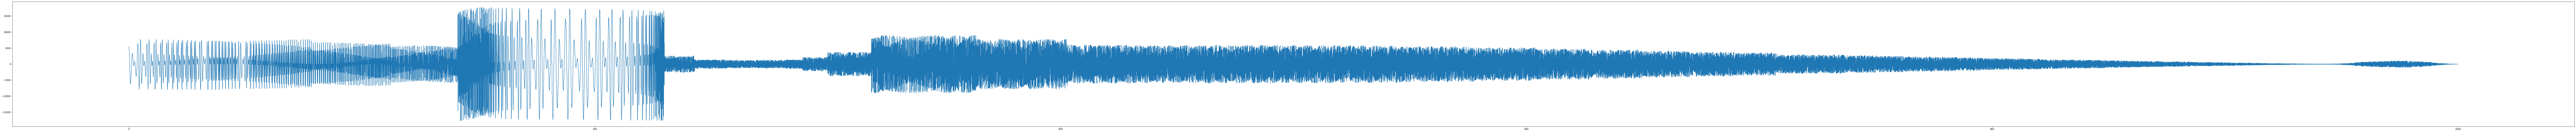

In [46]:
plt.figure(figsize = (200,10)) 
x = np.linspace(0, 1000, len(cut))
plt.plot(x,sweep)
plt.show()